# LAPTOP PRICE PREDICTION                  
### ZHAKUPOVA ZARINA,   ID: 190109013

### I took the data from the site: https://www.kaggle.com/datasets/ionaskel/laptop-prices . Our file contains 1303 rows and 12 columns. The attributes: company, typename, inches, screenresolution, cpu, ram, memory, gpu, opsys, weight and finally, the price. My task is to predict the price of a laptop based on several factors. Next, we need to build models with different methods and train them, then choose the best one.

# 1. DATA LOADING 

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [40]:
df = pd.read_csv('laptops.csv')
df

,Unnamed: 0,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price
0,0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,71378.6832
1,1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,47895.5232
2,2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,No OS,1.86kg,30636.0000
3,3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16GB,512GB SSD,AMD Radeon Pro 455,macOS,1.83kg,135195.3360
4,4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8GB,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37kg,96095.8080
...,...,...,...,...,...,...,...,...,...,...,...,...
1298,1298,Lenovo,2 in 1 Convertible,14.0,IPS Panel Full HD / Touchscreen 1920x1080,Intel Core i7 6500U 2.5GHz,4GB,128GB SSD,Intel HD Graphics 520,Windows 10,1.8kg,33992.6400
1299,1299,Lenovo,2 in 1 Convertible,13.3,IPS Panel Quad HD+ / Touchscreen 3200x1800,Intel Core i7 6500U 2.5GHz,16GB,512GB SSD,Intel HD Graphics 520,Windows 10,1.3kg,79866.7200
1300,1300,Lenovo,Notebook,14.0,1366x768,Intel Celeron Dual Core N3050 1.6GHz,2GB,64GB Flash Storage,Intel HD Graphics,Windows 10,1.5kg,12201.1200
1301,1301,HP,Notebook,15.6,1366x768,Intel Core i7 6500U 2.5GHz,6GB,1TB HDD,AMD Radeon R5 M330,Windows 10,2.19kg,40705.9200


# 2. DATA ANALYZING

In [41]:
df.describe()

,Unnamed: 0,Inches,Price
count,1303.00000,1303.000000,1303.000000
mean,651.00000,15.017191,59870.042910
std,376.28801,1.426304,37243.201786
min,0.00000,10.100000,9270.720000
25%,325.50000,14.000000,31914.720000
50%,651.00000,15.600000,52054.560000
75%,976.50000,15.600000,79274.246400
max,1302.00000,18.400000,324954.720000


Here we checking for non-null and duplicate values in all columns.

In [42]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1303 entries, 0 to 1302
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Unnamed: 0        1303 non-null   int64  
 1   Company           1303 non-null   object 
 2   TypeName          1303 non-null   object 
 3   Inches            1303 non-null   float64
 4   ScreenResolution  1303 non-null   object 
 5   Cpu               1303 non-null   object 
 6   Ram               1303 non-null   object 
 7   Memory            1303 non-null   object 
 8   Gpu               1303 non-null   object 
 9   OpSys             1303 non-null   object 
 10  Weight            1303 non-null   object 
 11  Price             1303 non-null   float64
dtypes: float64(2), int64(1), object(9)
memory usage: 122.3+ KB


In [43]:
df.duplicated().sum()

0

In [44]:
df.isnull().sum()

Unnamed: 0          0
Company             0
TypeName            0
Inches              0
ScreenResolution    0
Cpu                 0
Ram                 0
Memory              0
Gpu                 0
OpSys               0
Weight              0
Price               0
dtype: int64

In [45]:
D = df['Company'].value_counts().to_dict()
D

{'Dell': 297,
 'Lenovo': 297,
 'HP': 274,
 'Asus': 158,
 'Acer': 103,
 'MSI': 54,
 'Toshiba': 48,
 'Apple': 21,
 'Samsung': 9,
 'Razer': 7,
 'Mediacom': 7,
 'Microsoft': 6,
 'Xiaomi': 4,
 'Vero': 4,
 'Chuwi': 3,
 'Google': 3,
 'Fujitsu': 3,
 'LG': 3,
 'Huawei': 2}

We create a chart to find out which companies have more brands in the production of laptops. For this we used the matplotlib. We also need to find out which company produces expensive laptops.

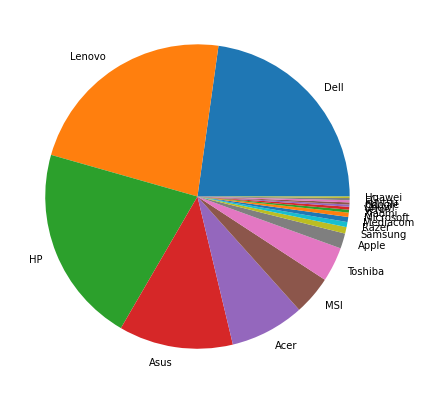

In [46]:
import matplotlib.pyplot as plt
fig = plt.figure(figsize =(10, 7))
plt.pie(D.values(), labels = D.keys())
plt.show()

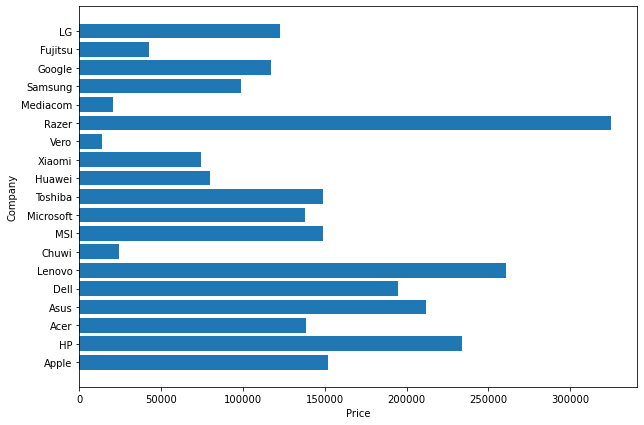

In [47]:
fig = plt.figure(figsize =(10, 7))
plt.barh(df['Company'], df['Price'])
plt.xlabel('Price')
plt.ylabel('Company')
plt.show()

# 3. PREPROCESSING AND ENCODING

Now, in order for our model to train easily, we need to interpret complex,  unnecessary values in order to make our data easier to understand.

In [48]:
df

,Unnamed: 0,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price
0,0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,71378.6832
1,1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,47895.5232
2,2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,No OS,1.86kg,30636.0000
3,3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16GB,512GB SSD,AMD Radeon Pro 455,macOS,1.83kg,135195.3360
4,4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8GB,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37kg,96095.8080
...,...,...,...,...,...,...,...,...,...,...,...,...
1298,1298,Lenovo,2 in 1 Convertible,14.0,IPS Panel Full HD / Touchscreen 1920x1080,Intel Core i7 6500U 2.5GHz,4GB,128GB SSD,Intel HD Graphics 520,Windows 10,1.8kg,33992.6400
1299,1299,Lenovo,2 in 1 Convertible,13.3,IPS Panel Quad HD+ / Touchscreen 3200x1800,Intel Core i7 6500U 2.5GHz,16GB,512GB SSD,Intel HD Graphics 520,Windows 10,1.3kg,79866.7200
1300,1300,Lenovo,Notebook,14.0,1366x768,Intel Celeron Dual Core N3050 1.6GHz,2GB,64GB Flash Storage,Intel HD Graphics,Windows 10,1.5kg,12201.1200
1301,1301,HP,Notebook,15.6,1366x768,Intel Core i7 6500U 2.5GHz,6GB,1TB HDD,AMD Radeon R5 M330,Windows 10,2.19kg,40705.9200


In [49]:
df = df.drop(column s=['Unnamed: 0'])


Sinse we want to change this column type into an INT(). For example, as you can see we remove all non-numbers values from each row and each column and replace the 'TB' number 1000. For the transformation, we use LabelEncoder -  part of the SciKit Learn library in Python and are used to convert categorical or textual data into numbers that our predictive models understand better.


In [50]:
CPU = []
for i in df['Cpu']:
    CPU.append(i[:13])
df['Cpu'] = CPU

In [51]:
from sklearn.preprocessing import LabelEncoder
company = LabelEncoder()
typename = LabelEncoder()
opsys = LabelEncoder()
cpu = LabelEncoder()
df['Company'] = company.fit_transform(df['Company'])
df['TypeName'] = typename.fit_transform(df['TypeName'])
df['OpSys'] = opsys.fit_transform(df['OpSys'])
df['Cpu'] = cpu.fit_transform(df['Cpu'])

df['Ram'] = df['Ram'].str.replace('GB','')
df['Weight'] = df['Weight'].str.replace('kg','')
df['Ram'] = df['Ram'].astype(int)
df['Weight'] = df['Weight'].astype(float)
df['Weight'] = df['Weight'].astype(float)

In [52]:
new = df['ScreenResolution'].str.split('x',n=1,expand=True)
Screen_y = new[1].astype(int)
Screen_x = []
for i in new[0]:
    Screen_x.append(int(i[-4:]))
df['Screen_x'] = Screen_x
df['Screen_y'] = Screen_y
df= df.drop(columns = ['ScreenResolution', 'Gpu'])
df

,Company,TypeName,Inches,Cpu,Ram,Memory,OpSys,Weight,Price,Screen_x,Screen_y
0,1,4,13.3,17,8,128GB SSD,8,1.37,71378.6832,2560,1600
1,1,4,13.3,17,8,128GB Flash Storage,8,1.34,47895.5232,1440,900
2,7,3,15.6,17,8,256GB SSD,4,1.86,30636.0000,1920,1080
3,1,4,15.4,18,16,512GB SSD,8,1.83,135195.3360,2880,1800
4,1,4,13.3,17,8,256GB SSD,8,1.37,96095.8080,2560,1600
...,...,...,...,...,...,...,...,...,...,...,...
1298,10,0,14.0,18,4,128GB SSD,5,1.80,33992.6400,1920,1080
1299,10,0,13.3,18,16,512GB SSD,5,1.30,79866.7200,3200,1800
1300,10,3,14.0,14,2,64GB Flash Storage,5,1.50,12201.1200,1366,768
1301,7,3,15.6,18,6,1TB HDD,5,2.19,40705.9200,1366,768


In [53]:
df['Memory'] = df['Memory'].astype(str).replace('\.0', '', regex=True)
df["Memory"] = df["Memory"].str.replace('GB', '')
df["Memory"] = df["Memory"].str.replace('TB', '000')
new = df["Memory"].str.split("+", n = 1, expand = True)

df["first"]= new[0]
df["first"]=df["first"].str.strip()

df["second"]= new[1]

df["Layer1HDD"] = df["first"].apply(lambda x: 1 if "HDD" in x else 0)
df["Layer1SSD"] = df["first"].apply(lambda x: 1 if "SSD" in x else 0)
df["Layer1Hybrid"] = df["first"].apply(lambda x: 1 if "Hybrid" in x else 0)
df["Layer1Flash_Storage"] = df["first"].apply(lambda x: 1 if "Flash Storage" in x else 0)

df['first'] = df['first'].str.replace(r'\D', '')

df["second"].fillna("0", inplace = True)

df["Layer2HDD"] = df["second"].apply(lambda x: 1 if "HDD" in x else 0)
df["Layer2SSD"] = df["second"].apply(lambda x: 1 if "SSD" in x else 0)
df["Layer2Hybrid"] = df["second"].apply(lambda x: 1 if "Hybrid" in x else 0)
df["Layer2Flash_Storage"] = df["second"].apply(lambda x: 1 if "Flash Storage" in x else 0)

df['second'] = df['second'].str.replace(r'\D', '')

df["first"] = df["first"].astype(int)
df["second"] = df["second"].astype(int)

df["HDD"]=(df["first"]*df["Layer1HDD"]+df["second"]*df["Layer2HDD"])
df["SSD"]=(df["first"]*df["Layer1SSD"]+df["second"]*df["Layer2SSD"])
df["Hybrid"]=(df["first"]*df["Layer1Hybrid"]+df["second"]*df["Layer2Hybrid"])
df["Flash_Storage"]=(df["first"]*df["Layer1Flash_Storage"]+df["second"]*df["Layer2Flash_Storage"])

df.drop(columns=['first', 'second', 'Layer1HDD', 'Layer1SSD', 'Layer1Hybrid',
       'Layer1Flash_Storage', 'Layer2HDD', 'Layer2SSD', 'Layer2Hybrid',
       'Layer2Flash_Storage', 'Hybrid', 'Flash_Storage'],inplace=True)
df = df.drop(columns = 'Memory')
df['SSD'] = df['SSD'].astype(int)
df['HDD'] = df['HDD'].astype(int)
df

C:\Users\Asus\AppData\Local\Temp/ipykernel_8432/1947450585.py:16: FutureWarning: The default value of regex will change from True to False in a future version.
  df['first'] = df['first'].str.replace(r'\D', '')
C:\Users\Asus\AppData\Local\Temp/ipykernel_8432/1947450585.py:25: FutureWarning: The default value of regex will change from True to False in a future version.
  df['second'] = df['second'].str.replace(r'\D', '')


,Company,TypeName,Inches,Cpu,Ram,OpSys,Weight,Price,Screen_x,Screen_y,HDD,SSD
0,1,4,13.3,17,8,8,1.37,71378.6832,2560,1600,0,128
1,1,4,13.3,17,8,8,1.34,47895.5232,1440,900,0,0
2,7,3,15.6,17,8,4,1.86,30636.0000,1920,1080,0,256
3,1,4,15.4,18,16,8,1.83,135195.3360,2880,1800,0,512
4,1,4,13.3,17,8,8,1.37,96095.8080,2560,1600,0,256
...,...,...,...,...,...,...,...,...,...,...,...,...
1298,10,0,14.0,18,4,5,1.80,33992.6400,1920,1080,0,128
1299,10,0,13.3,18,16,5,1.30,79866.7200,3200,1800,0,512
1300,10,3,14.0,14,2,5,1.50,12201.1200,1366,768,0,0
1301,7,3,15.6,18,6,5,2.19,40705.9200,1366,768,1000,0


In [54]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1303 entries, 0 to 1302
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Company   1303 non-null   int32  
 1   TypeName  1303 non-null   int32  
 2   Inches    1303 non-null   float64
 3   Cpu       1303 non-null   int32  
 4   Ram       1303 non-null   int32  
 5   OpSys     1303 non-null   int32  
 6   Weight    1303 non-null   float64
 7   Price     1303 non-null   float64
 8   Screen_x  1303 non-null   int64  
 9   Screen_y  1303 non-null   int32  
 10  HDD       1303 non-null   int32  
 11  SSD       1303 non-null   int32  
dtypes: float64(3), int32(8), int64(1)
memory usage: 81.6 KB


# 4. СALCULATION OF CORRELATION

In [55]:
df.corr()['Price']

Company     0.140371
TypeName   -0.127313
Inches      0.068197
Cpu         0.370381
Ram         0.743007
OpSys       0.288911
Weight      0.210370
Price       1.000000
Screen_x    0.556529
Screen_y    0.552809
HDD        -0.096441
SSD         0.670799
Name: Price, dtype: float64

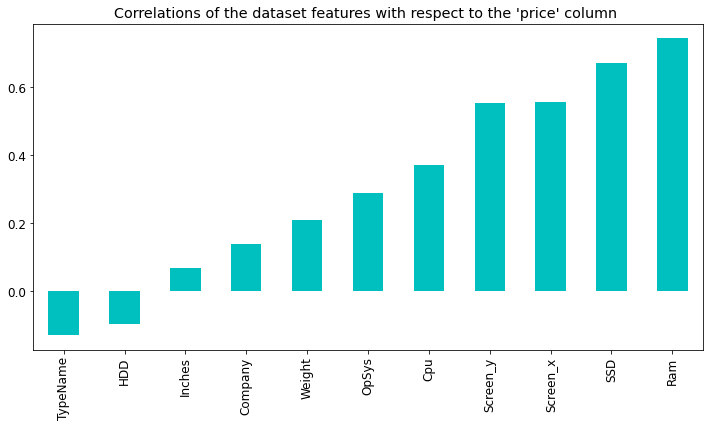

In [56]:
plt.figure(figsize=(12,6))
plt.rcParams['font.size']=12
df.corr(method='pearson')['Price'].sort_values().drop('Price').plot(kind='bar',color='c')
plt.title("Correlations of the dataset features with respect to the 'price' column ");

In [57]:
df = df.drop(columns = ['TypeName', 'HDD'])
df

,Company,Inches,Cpu,Ram,OpSys,Weight,Price,Screen_x,Screen_y,SSD
0,1,13.3,17,8,8,1.37,71378.6832,2560,1600,128
1,1,13.3,17,8,8,1.34,47895.5232,1440,900,0
2,7,15.6,17,8,4,1.86,30636.0000,1920,1080,256
3,1,15.4,18,16,8,1.83,135195.3360,2880,1800,512
4,1,13.3,17,8,8,1.37,96095.8080,2560,1600,256
...,...,...,...,...,...,...,...,...,...,...
1298,10,14.0,18,4,5,1.80,33992.6400,1920,1080,128
1299,10,13.3,18,16,5,1.30,79866.7200,3200,1800,512
1300,10,14.0,14,2,5,1.50,12201.1200,1366,768,0
1301,7,15.6,18,6,5,2.19,40705.9200,1366,768,0


# 5. MODELS TRAINING

We move on to the division of the set into training and testing.

In [58]:
from sklearn.model_selection import train_test_split

X = df.drop(columns = ['Price'])
Y = df['Price']
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.1)

### LINEAR REGRESSION

In [59]:
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()
lin_reg.fit(X, Y)

LinearRegression()

In [62]:
from sklearn.metrics import mean_squared_error
import numpy as np

y_pred_lr = lin_reg.predict(X)
lin_mse = mean_squared_error(Y, y_pred_lr)
lin_rmse = np.sqrt(lin_mse)
print("Mean squared error MSE: ", lin_mse)
print("Root mean square error RMSE: ", lin_rmse)

Mean squared error MSE:  403460950.22916216
Root mean square error RMSE:  20086.337402054218


The error is too high, and this means that the model is underfitting.

Let's see how accurate is our model

In [63]:
from sklearn import metrics
accuracy_lin = metrics.r2_score(Y, y_pred_lr)
print("Linear Regression r2: ",accuracy_lin)

Linear Regression r2:  0.7089008626972422


### DECISION TREE MODEL

In [64]:
from sklearn.tree import DecisionTreeRegressor

tree_reg=DecisionTreeRegressor()
tree_reg.fit(X,Y)
y_pred_dt=tree_reg.predict(X)

dt_mse = mean_squared_error(Y, y_pred_dt)
dt_rmse = np.sqrt(dt_mse)
print("Decision Tree Regression MSE: ",dt_mse)
print("Decision Tree Regression RMSE: ",dt_rmse)

Decision Tree Regression MSE:  13229140.189097647
Decision Tree Regression RMSE:  3637.1885006275998


In [65]:
accuracy_dt = metrics.r2_score(Y, y_pred_dt)
print("Decision Tree Regression r2: ",accuracy_dt)

Decision Tree Regression r2:  0.9904551077517756


# 6. VALIDATION AND FINE-TUNING

The problem of overfitting and underfitting arises when we talk about the degree of a polynomial. The degree shows how flexible the model is. The underfitting model will be less flexible and will not be able to account for the data. The best way to understand the problem is to look at models that demonstrate both situations. We need to create a model with the best settings (degree), so we have to implement the concept of validation - this is k-fold cross-validation.

The idea is that instead of using a separate test set, we split the training set into several subsets called folds. Let's take 10 folds as an example. This is how we train and train the model 10 times on the data. During each iteration, we use one fold for evaluation and nine folds for training. Then we keep shuffling the folds so that a different fold is used for evaluation each time.

In [66]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(tree_reg, X, Y,\
                         scoring="neg_mean_squared_error", cv=10)

dt_rmse_scores = np.sqrt(-scores)
def display_scores(scores):
    print('Scores: ', scores)
    print('Mean: ', scores.mean())
    print('Standard deviation: ', scores.std())
display_scores(dt_rmse_scores)

Scores:  [17915.63993589 18284.72036828 20387.16867149 26984.35651055
 23712.3423146  24842.13054798 25646.44780608 19000.8106511
 31180.19380768 18810.75359391]
Mean:  22676.456420757175
Standard deviation:  4255.622084892975


In [67]:
lrk_scores = cross_val_score(lin_reg, X, Y,\
                             scoring="neg_mean_squared_error", cv=10)

lrk_rmse_scores = np.sqrt(-lrk_scores)
display_scores(lrk_rmse_scores)

Scores:  [15923.48186389 20032.93150373 17863.91471998 18917.87906503
 19879.72243726 21077.52711367 26624.97423774 19241.5837559
 25668.16083691 17567.75883624]
Mean:  20279.793437034776
Standard deviation:  3244.301797612463


In [68]:
from sklearn.ensemble import RandomForestRegressor
Random_forest_regressor = RandomForestRegressor(random_state=10)
Random_forest_regressor.fit(X_train,y_train)
print("Training score")
print(Random_forest_regressor.score(X_train,y_train))
print('\r')
print("Testing score")
print(Random_forest_regressor.score(X_test,y_test))

Training score
0.9626700088863935

Testing score
0.8472901397425983


In [69]:
from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor()

rfk_scores = cross_val_score(Random_forest_regressor, X, Y,\
                             scoring="neg_mean_squared_error", cv=10)

rfk_rmse_scores = np.sqrt(-rfk_scores)
display_scores(rfk_rmse_scores)

Scores:  [12982.75491299 15008.57919414 14272.88051907 20783.6364001
 17254.25907559 19740.97662325 21022.20408815 14490.82602427
 24427.03651405 15663.12815314]
Mean:  17564.62815047454
Standard deviation:  3544.9799507667753


The RF regressor performed better than the other models, but it is still overfitting the data.

Let us fine-tune the model to improve its performance. One of the important tasks for building a machine learning model. Changing the model parameters can fundamentally affect its quality. For example, as it turned out in our case, the model can be retrained. Enumeration of these parameters manually can take a huge amount of time. However, there is a GridSearchCV module.
GridSearchCV is a very powerful tool for automatically fitting parameters for machine learning models. GridSearchCV finds the best parameters by simple iteration: it creates a model for every possible combination of parameters.

In [70]:
from sklearn.model_selection import GridSearchCV

param_grid = [
    {'n_estimators': [3, 10, 30], 'max_features': [2, 4, 6, 8]},
    {'bootstrap': [False], 'n_estimators': [3, 10],\
     'max_features': [2, 3, 4]}
]

grid_rf = GridSearchCV(rf, param_grid, cv=5,\
                       scoring='neg_mean_squared_error',\
                       return_train_score=True)

grid_rf.fit(X, Y)

GridSearchCV(cv=5, estimator=RandomForestRegressor(),
             param_grid=[{'max_features': [2, 4, 6, 8],
                          'n_estimators': [3, 10, 30]},
                         {'bootstrap': [False], 'max_features': [2, 3, 4],
                          'n_estimators': [3, 10]}],
             return_train_score=True, scoring='neg_mean_squared_error')

In [71]:
print(grid_rf.best_score_)
print(grid_rf.best_params_)
print(grid_rf.best_estimator_)

-309764923.73750365
{'max_features': 2, 'n_estimators': 30}
RandomForestRegressor(max_features=2, n_estimators=30)


In [73]:
rf_grid = grid_rf.best_estimator_
rf_grid.score(X, Y)

0.9632964027718586